In [1]:
# calculate train and test word frequency
import json
import konlpy

dataset = json.load(open('/home/sabina/korean_data/13_CUJ/dataset.json', 'r')) 
dataset

[{'audio': {'path': '/home/sabina/korean_data/13_CUJ/ID-01-13-N-CUJ-02-01-F-36-kk_0.wav',
   'sampling_rate': 44100},
  'sentence': '나는 바지를 입고 단추를 채운다.',
  'speaker_id': 'CUJ'},
 {'audio': {'path': '/home/sabina/korean_data/13_CUJ/ID-01-13-N-CUJ-02-01-F-36-kk_1.wav',
   'sampling_rate': 44100},
  'sentence': '책상 위에 가방이 있습니다.',
  'speaker_id': 'CUJ'},
 {'audio': {'path': '/home/sabina/korean_data/13_CUJ/ID-01-13-N-CUJ-02-01-F-36-kk_2.wav',
   'sampling_rate': 44100},
  'sentence': '가방에 사탕과 연필이 넣을 거예요.',
  'speaker_id': 'CUJ'},
 {'audio': {'path': '/home/sabina/korean_data/13_CUJ/ID-01-13-N-CUJ-02-01-F-36-kk_3.wav',
   'sampling_rate': 44100},
  'sentence': '아빠와 자동차를 타고.',
  'speaker_id': 'CUJ'},
 {'audio': {'path': '/home/sabina/korean_data/13_CUJ/ID-01-13-N-CUJ-02-01-F-36-kk_4.wav',
   'sampling_rate': 44100},
  'sentence': '동물원에 갑니다.',
  'speaker_id': 'CUJ'},
 {'audio': {'path': '/home/sabina/korean_data/13_CUJ/ID-01-13-N-CUJ-02-01-F-36-kk_5.wav',
   'sampling_rate': 44100},
  'senten

In [2]:
with open('../train/test_indices.txt', 'r') as f:
    test_indices = f.readlines()
print(test_indices)
test_indices = [int(x.strip()) for x in test_indices[0].split(',')]
train_sentences = [dataset[i]['sentence'] for i in range(len(dataset)) if i not in test_indices]
test_set = [dataset[i]['sentence'] for i in range(len(dataset)) if i in test_indices]
test_set

['0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 51, 192, 338, 261, 227, 287, 111, 13, 160, 232, 25, 330, 256, 281, 26, 56, 23, 290, 84, 119, 164, 38, 209, 49, 280, 283, 134, 240, 219, 190, 315, 273, 15, 224, 96, 239, 61, 317, 109, 212, 35, 168, 339, 333, 274, 153, 201, 285, 110, 24, 313, 186, 122, 328, 241, 182, 345, 299, 34']


['나는 바지를 입고 단추를 채운다.',
 '책상 위에 가방이 있습니다.',
 '가방에 사탕과 연필이 넣을 거예요.',
 '아빠와 자동차를 타고.',
 '동물원에 갑니다.',
 '잘 다녀와 하면서 엄마가 뽀뽀를 해줍니다.',
 '동물원에 호랑이가 꼬리를 늘어트리고 있습니다.',
 '나는 코끼리에게 땅콩을 주고.',
 '나는 동물원에 놀러터에서 그네를 탔습니다.',
 '아빠가 토끼를 풍선을 사왔습니다.',
 '엄마에게 전화를 합니다. 엄마 동물원에 재미있어요.',
 '배',
 '귤',
 '물',
 '피',
 '쥐',
 '붓',
 '뿔',
 '씨',
 '햄',
 '뱀',
 '김',
 '절',
 '파',
 '껌',
 '귀',
 '남',
 '해',
 '소',
 '앞',
 '벌',
 '폐',
 '어',
 '야',
 '와',
 '라',
 '사',
 '차 카',
 '안경',
 '연필',
 '토끼',
 '참새',
 '전화',
 '시간',
 '땅콩',
 '노래',
 '문제',
 '나무',
 '가위',
 '뽀뽀',
 '귀',
 '메뚜기',
 '전화',
 '내일 만나?',
 '이제 내려.',
 '머리 말려?',
 '나비가 날아요.',
 '엄마가 노래해.',
 '머리를 말려요?',
 '머리 말려요.',
 '길이 많이 막혀요.',
 '선생님 하 하셔요.',
 '기 갈래.',
 '음악 커?',
 '휴지를 버려 주세요.',
 '감기에 걸리 않도록 조심해라.',
 '커피를 마셔서 잠이 오지 않는다.',
 '여기서 기다리세요.',
 '일을 마치고 갈 시간 충분합니다.']

In [4]:

from jamo import h2j, j2hcj  # Import necessary functions from the jamo library

train_phonemes = []
test_phonemes = []

# Function to split a sentence into phonemes
def sentence_to_phonemes(sentence):
    # Convert sentence to jamo (Korean phonemes)
    phonemes = j2hcj(h2j(sentence))
    return phonemes

for sentence in train_sentences:
    # Convert to lower case
    sentence = sentence.lower()
    sentence = sentence.replace('.', '').replace(',', '').replace('?', '').replace('!', '')
    phonemes = sentence_to_phonemes(sentence)
    train_phonemes.extend(phonemes)

for sentence in test_set:
    # Convert to lower case
    sentence = sentence.lower()
    sentence = sentence.replace('.', '').replace(',', '').replace('?', '').replace('!', '')
    phonemes = sentence_to_phonemes(sentence)
    test_phonemes.extend(phonemes)

# Print results for verification
print("Train phonemes:", train_phonemes)
print("Test phonemes:", test_phonemes)


Train phonemes: ['ㄹ', 'ㅗ', 'ㅂ', 'ㅗ', 'ㅅ', ' ', 'ㄱ', 'ㅡ', 'ㄹ', 'ㅣ', 'ㅁ', 'ㅇ', 'ㅡ', 'ㄹ', ' ', 'ㄱ', 'ㅜ', 'ㄱ', 'ㅕ', 'ㅇ', 'ㅎ', 'ㅏ', 'ㅂ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㅏ', ' ', 'ㄱ', 'ㅡ', 'ㄹ', 'ㅣ', 'ㅁ', 'ㅇ', 'ㅡ', 'ㄴ', ' ', 'ㅁ', 'ㅗ', 'ㅅ', ' ', 'ㄷ', 'ㅜ', ' ', 'ㄱ', 'ㅐ', 'ㅇ', 'ㅔ', ' ', 'ㄱ', 'ㅓ', 'ㄹ', 'ㄹ', 'ㅕ', ' ', 'ㅇ', 'ㅣ', 'ㅆ', 'ㅅ', 'ㅡ', 'ㅂ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㅏ', 'ㄹ', 'ㅗ', 'ㅂ', 'ㅗ', 'ㅅ', 'ㅇ', 'ㅡ', 'ㄴ', ' ', 'ㄱ', 'ㅣ', 'ㄴ', ' ', 'ㄴ', 'ㅜ', 'ㄴ', 'ㅆ', 'ㅓ', 'ㅂ', ' ', 'ㄱ', 'ㅚ', 'ㅁ', 'ㅜ', 'ㄹ', 'ㄱ', 'ㅘ', ' ', 'ㅆ', 'ㅏ', 'ㅇ', 'ㅜ', 'ㅁ', 'ㅇ', 'ㅡ', 'ㄹ', ' ', 'ㅎ', 'ㅏ', 'ㅂ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㅏ', ' ', 'ㄴ', 'ㅏ', 'ㅁ', 'ㅜ', 'ㅇ', 'ㅔ', 'ㄴ', 'ㅡ', 'ㄴ', ' ', 'ㅊ', 'ㅏ', 'ㅁ', 'ㅅ', 'ㅐ', ' ', 'ㅅ', 'ㅔ', ' ', 'ㅁ', 'ㅏ', 'ㄹ', 'ㅣ', 'ㄱ', 'ㅏ', ' ', 'ㅉ', 'ㅐ', 'ㄱ', 'ㅉ', 'ㅐ', 'ㄱ', ' ', 'ㄱ', 'ㅓ', 'ㄹ', 'ㅣ', 'ㄱ', 'ㅗ', 'ㄴ', 'ㅏ', 'ㅁ', 'ㅜ', ' ', 'ㅇ', 'ㅏ', 'ㄹ', 'ㅐ', ' ', 'ㅍ', 'ㅜ', 'ㄹ', 'ㅂ', 'ㅏ', 'ㅌ', 'ㅇ', 'ㅔ', 'ㄴ', 'ㅡ', 'ㄴ', ' ', 'ㅁ', 'ㅔ', 'ㄸ', 'ㅜ', 'ㄱ', 'ㅣ', 'ㄱ', 'ㅏ', ' ', 'ㅇ', 'ㅣ', 'ㅆ', 'ㅅ', 'ㅡ', 'ㅂ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㅏ', 'ㅎ', 'ㅐ', 'ㄱ', 'ㅐ', 'ㅈ', 'ㅣ', 'ㅂ'

In [6]:
len(train_phonemes), len(test_phonemes)

(2043, 832)

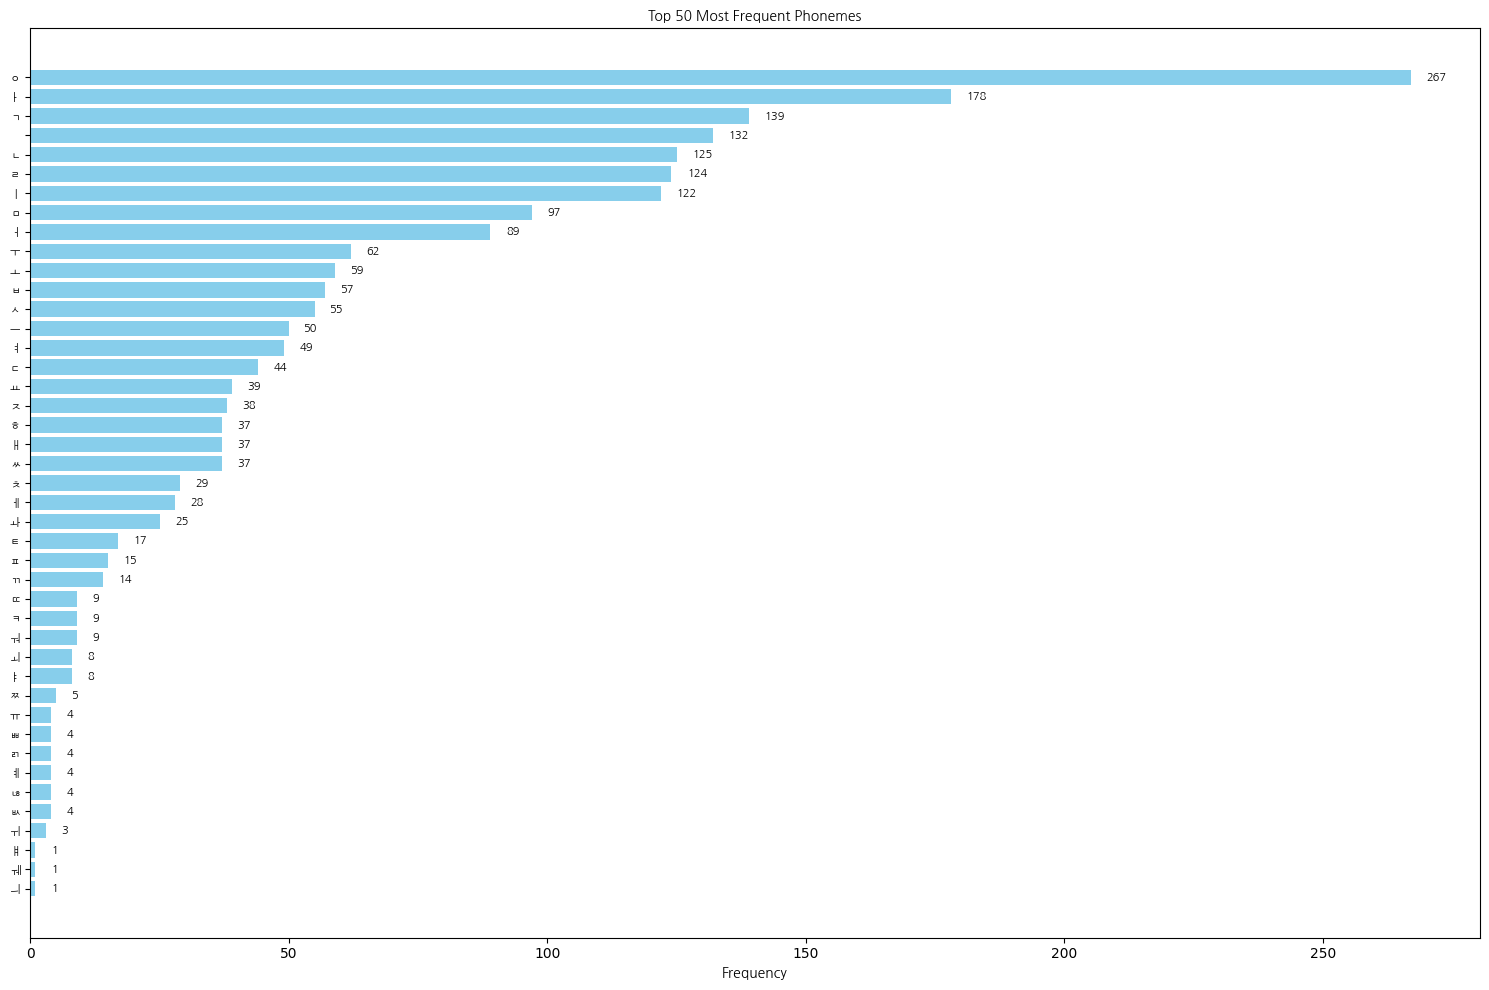

In [14]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Set up Korean font
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Adjust this path as needed
font_prop = fm.FontProperties(fname=font_path)

def plot_word_frequency(train_words, top_n=100, figsize=(15, 10), font_size=8):
    # Count word frequency
    word_counts = Counter(train_words)

    # Get the top N most common words
    top_words = dict(word_counts.most_common(top_n))

    # Create the horizontal bar chart
    fig, ax = plt.subplots(figsize=figsize)
    
    y_pos = np.arange(len(top_words))
    frequencies = list(top_words.values())
    words = list(top_words.keys())

    ax.barh(y_pos, frequencies, align='center', color='skyblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(words, fontproperties=font_prop, fontsize=font_size)
    ax.invert_yaxis()  # labels read top-to-bottom

    ax.set_xlabel('Frequency', fontproperties=font_prop)
    ax.set_title('Top {} Most Frequent Phonemes'.format(top_n), fontproperties=font_prop)

    # Add frequency labels to the end of each bar
    for i, v in enumerate(frequencies):
        ax.text(v + 3, i, str(v), va='center', fontproperties=font_prop, fontsize=font_size)

    plt.tight_layout()
    plt.show()


# Usage
plot_word_frequency(train_phonemes, top_n=50, figsize=(15, 10), font_size=8)

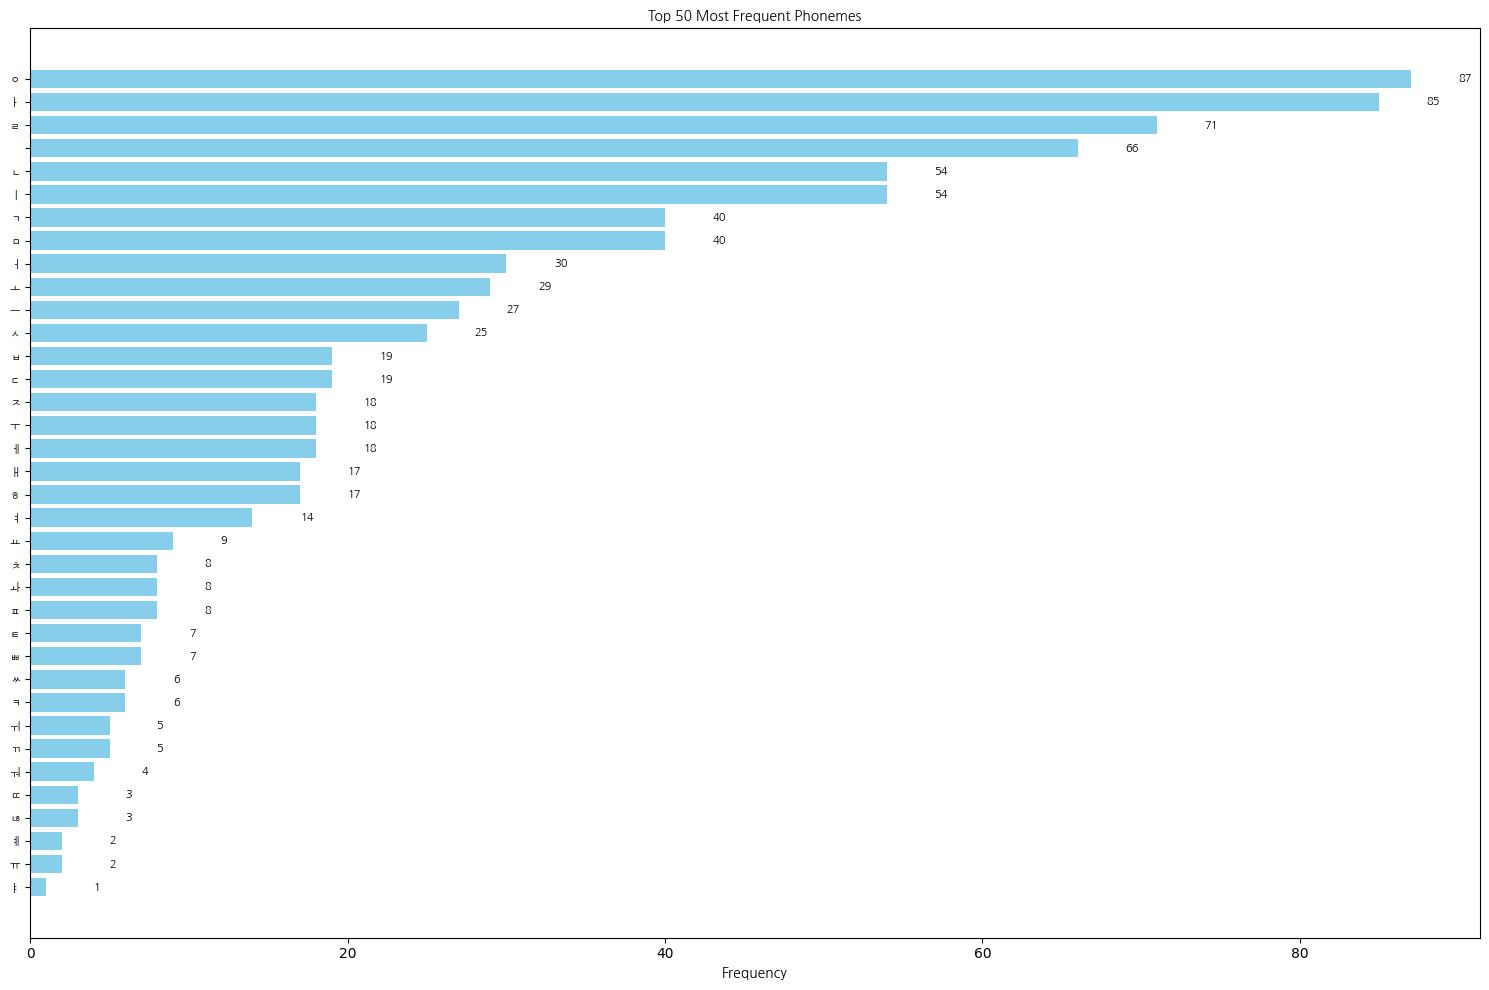

In [15]:
plot_word_frequency(test_phonemes, top_n=50, figsize=(15, 10), font_size=8)

In [13]:
print('Length of train phonemes:', len(train_phonemes))
print('Length of test phonemes:', len(test_phonemes))
print('Intersection of train and test phonemes:', len(set(train_phonemes) & set(test_phonemes)))
print('Difference of train and test phonemes:', len(set(train_phonemes) - set(test_phonemes)))

Length of train phonemes: 2043
Length of test phonemes: 832
Intersection of train and test phonemes: 36
Difference of train and test phonemes: 7


In [16]:
train_graphemes = []
test_graphemes = []

# Function to split a sentence into graphemes
def sentence_to_graphemes(sentence):
    # Each character in the sentence is treated as a grapheme
    return list(sentence)

for sentence in train_sentences:
    # Convert to lower case
    sentence = sentence.lower()
    
    # Remove punctuation
    sentence = sentence.replace('.', '').replace(',', '').replace('?', '').replace('!', '')
    
    # Convert sentence to graphemes
    graphemes = sentence_to_graphemes(sentence)
    
    # Extend the graphemes list
    train_graphemes.extend(graphemes)

for sentence in test_set:
    # Convert to lower case
    sentence = sentence.lower()
    
    # Remove punctuation
    sentence = sentence.replace('.', '').replace(',', '').replace('?', '').replace('!', '')
    
    # Convert sentence to graphemes
    graphemes = sentence_to_graphemes(sentence)
    
    # Extend the graphemes list
    test_graphemes.extend(graphemes)

# Print results for verification
print("Train graphemes:", train_graphemes)
print("Test graphemes:", test_graphemes)


Train graphemes: ['로', '봇', ' ', '그', '림', '을', ' ', '구', '경', '합', '니', '다', ' ', '그', '림', '은', ' ', '못', ' ', '두', ' ', '개', '에', ' ', '걸', '려', ' ', '있', '습', '니', '다', '로', '봇', '은', ' ', '긴', ' ', '눈', '썹', ' ', '괴', '물', '과', ' ', '싸', '움', '을', ' ', '합', '니', '다', ' ', '나', '무', '에', '는', ' ', '참', '새', ' ', '세', ' ', '마', '리', '가', ' ', '짹', '짹', ' ', '거', '리', '고', '나', '무', ' ', '아', '래', ' ', '풀', '밭', '에', '는', ' ', '메', '뚜', '기', '가', ' ', '있', '습', '니', '다', '해', '개', '집', '일', '입', '이', '꿀', '불', '비', '귀', '콩', '돈', '공', '손', '풀', '윷', '잎', '빗', '침', '벌', '성', '별', '형', '초', '눈', '코', '문', '잼', '책', '실', '힘', '칠', '종', '총', '털', '몸', '톱', '강', '발', '왕', '달', '뼈', '영', '혀', '병', '밤', '활', '감', '탈', '꽃', '점', '솥', '섬', '금', '육', '은', '흙', '산', '삼', '차', '춤', '국', '꿈', '북', '칼', '말', ' ', '쌀', '떡', '컵', '턱', '방', '빵', '창', '양', '오', '곰', '소', '돌', '약', '탑', '닭', '밥', '밀', '옷', '잔', '댁', '겁', '시', '병', '점', '키', '무', '논', '자', '글', '용', '겉', '다', '뜰', '피', '상', '네', '추', ' 

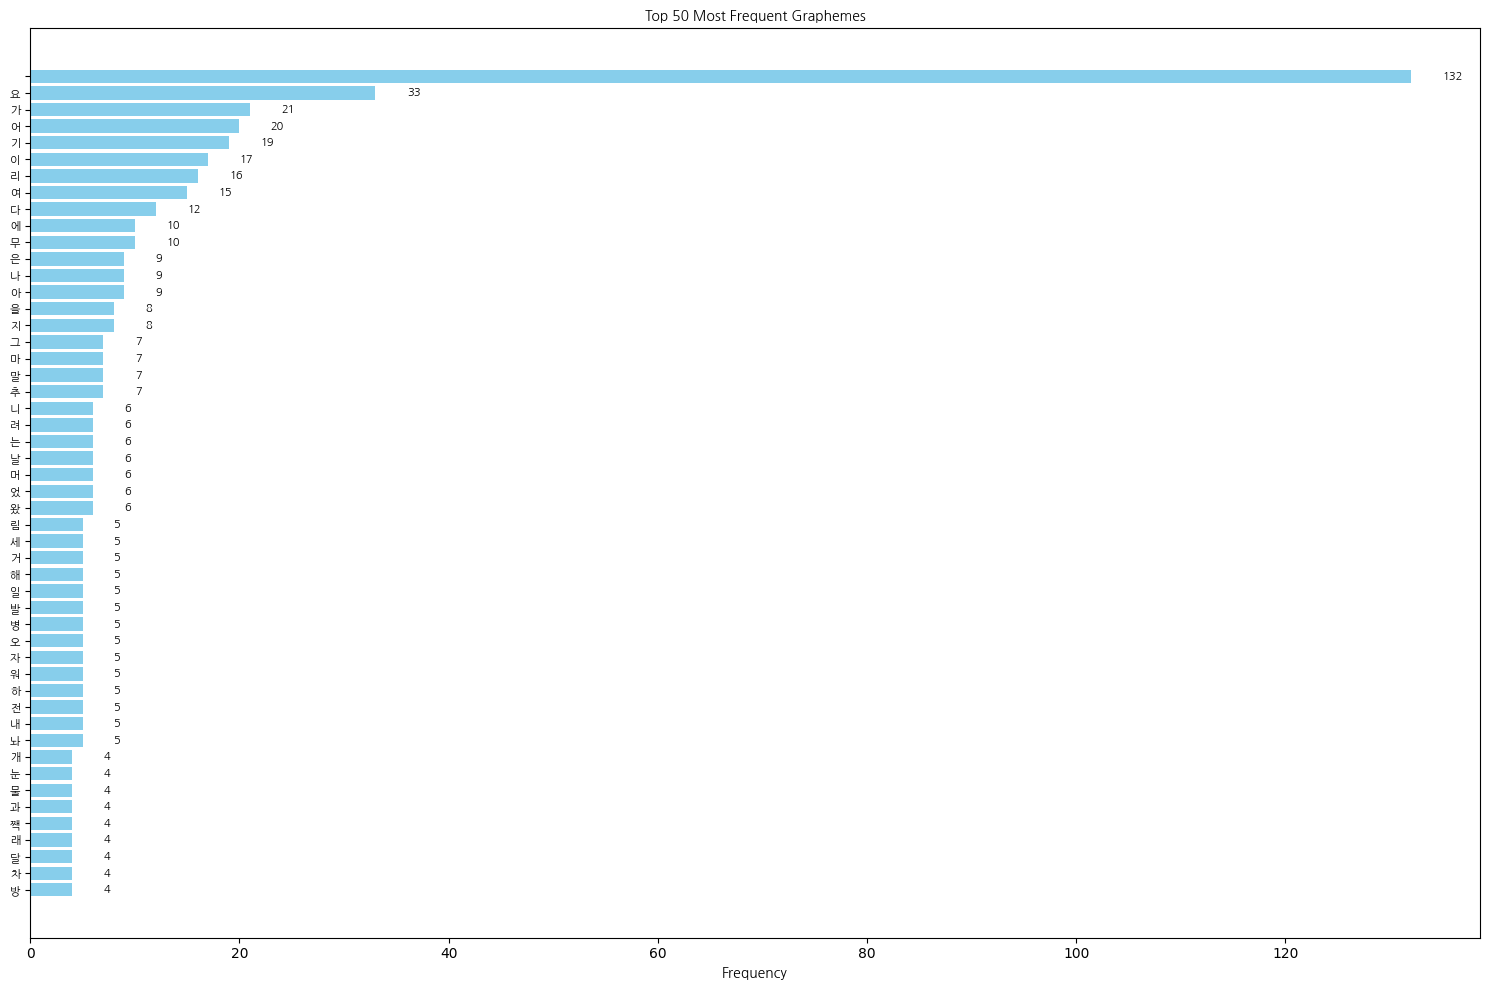

In [18]:
def plot_grapheme_frequency(train_words, top_n=100, figsize=(15, 10), font_size=8):
    # Count word frequency
    word_counts = Counter(train_words)

    # Get the top N most common words
    top_words = dict(word_counts.most_common(top_n))

    # Create the horizontal bar chart
    fig, ax = plt.subplots(figsize=figsize)
    
    y_pos = np.arange(len(top_words))
    frequencies = list(top_words.values())
    words = list(top_words.keys())

    ax.barh(y_pos, frequencies, align='center', color='skyblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(words, fontproperties=font_prop, fontsize=font_size)
    ax.invert_yaxis()  # labels read top-to-bottom

    ax.set_xlabel('Frequency', fontproperties=font_prop)
    ax.set_title('Top {} Most Frequent Graphemes'.format(top_n), fontproperties=font_prop)

    # Add frequency labels to the end of each bar
    for i, v in enumerate(frequencies):
        ax.text(v + 3, i, str(v), va='center', fontproperties=font_prop, fontsize=font_size)

    plt.tight_layout()
    plt.show()


# Usage
plot_grapheme_frequency(train_graphemes, top_n=50, figsize=(15, 10), font_size=8)

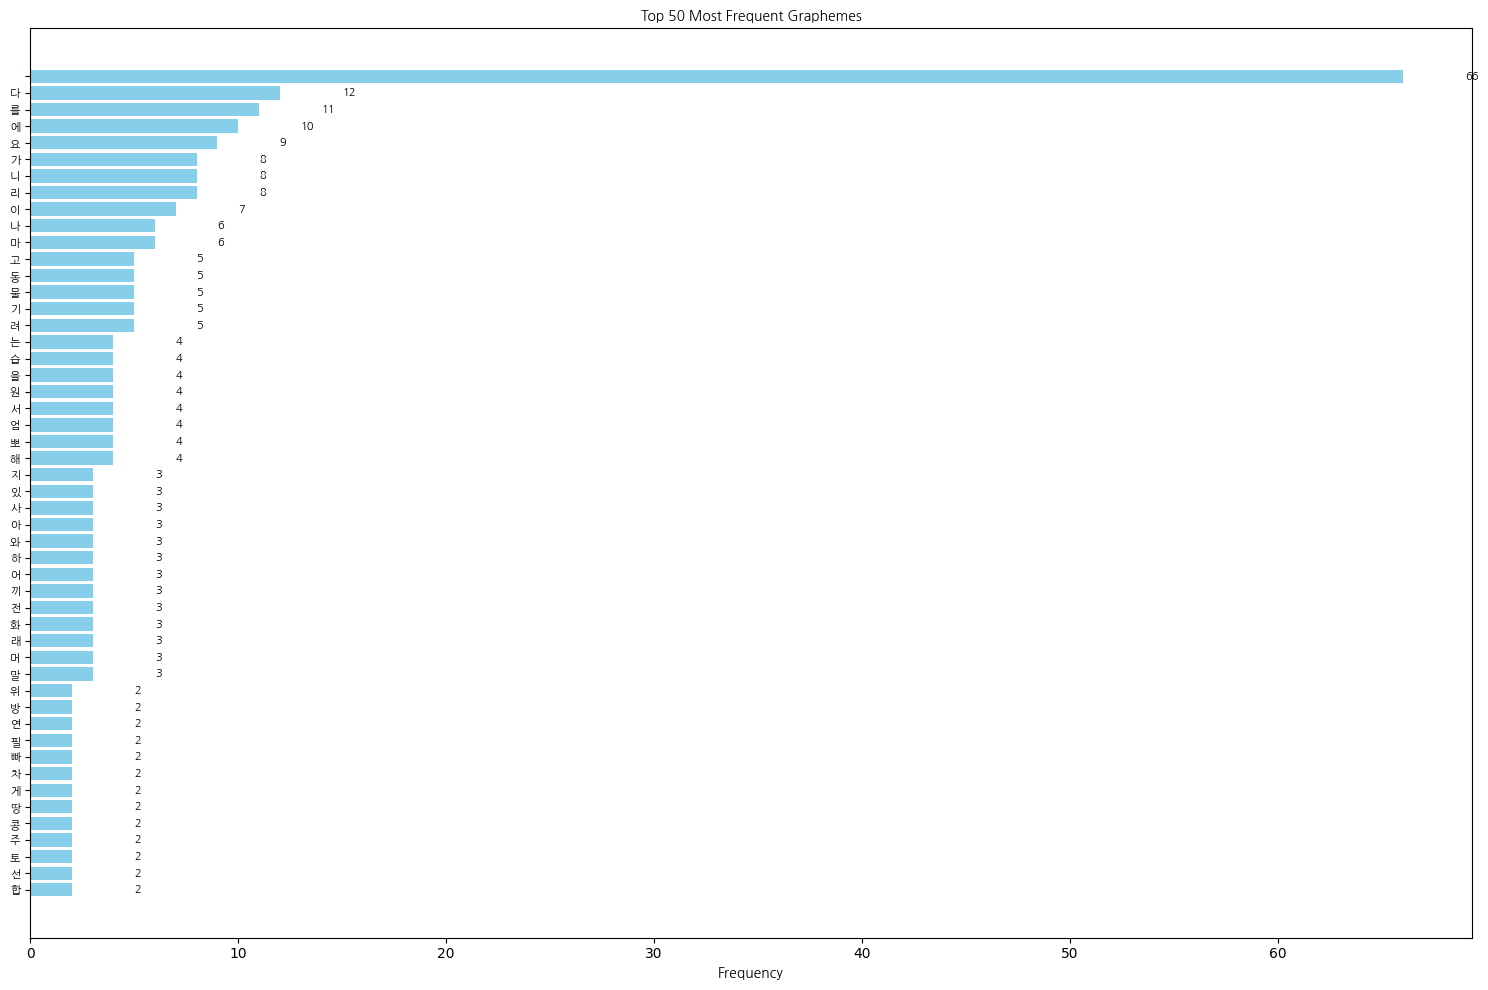

In [19]:
plot_grapheme_frequency(test_graphemes, top_n=50, figsize=(15, 10), font_size=8)

In [20]:
print('Length of train graphemes:', len(train_graphemes))
print('Length of test graphemes:', len(test_graphemes))
print('Intersection of train and test graphemes:', len(set(train_graphemes) & set(test_graphemes)))
print('Difference of train and test graphemes:', len(set(train_graphemes) - set(test_graphemes)))

Length of train graphemes: 909
Length of test graphemes: 389
Intersection of train and test graphemes: 116
Difference of train and test graphemes: 174
